##Importing necessary libraries

In [16]:
import numpy as np # To handle Numbers
import pandas as pd#For data manipulation
#For data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#For data preporcessing and evalution
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
#To build a training machine learning model
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow import keras
#To handle imbalanced datasets
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import balanced_accuracy_score
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
dataset = pd.read_csv("creditcard.csv")

In [18]:
# Explore the dataset
print(dataset.head())
print(dataset.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [19]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']
dataset.fillna(dataset.mean(), inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Convert to binary classification
y_train = pd.cut(y_train, bins=2, labels=[0, 1])
# Use RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


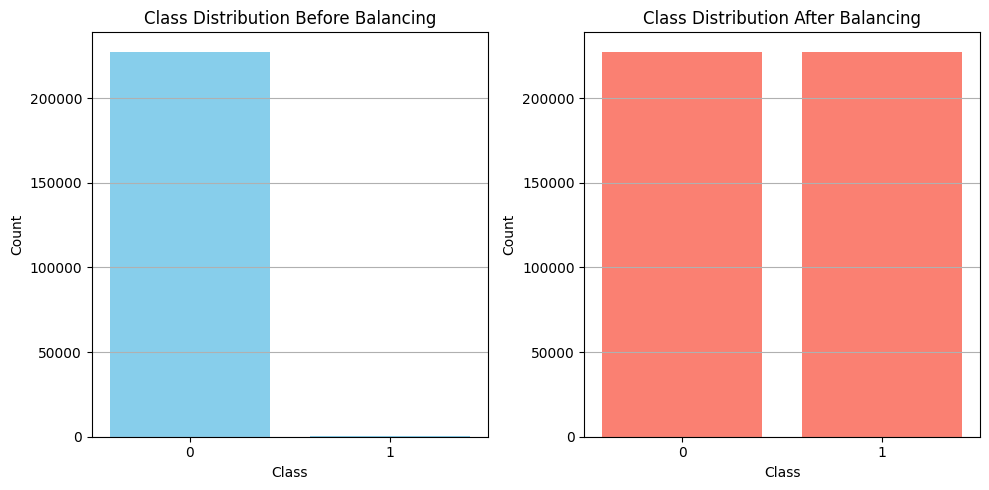

In [21]:
# Count the occurrences of each class before balancing
class_counts_before = pd.value_counts(y_train)

# Count the occurrences of each class after balancing
class_counts_after = pd.value_counts(y_train_resampled)

# Plotting the class distribution before and after balancing
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(class_counts_before.index, class_counts_before.values, color='skyblue')
plt.title('Class Distribution Before Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(class_counts_before.index)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
plt.bar(class_counts_after.index, class_counts_after.values, color='salmon')
plt.title('Class Distribution After Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(class_counts_after.index)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [22]:
#First model

model = keras.Sequential([
    layers.Dense(32, activation='relu', input_dim=X_train_resampled.shape[1]),
    layers.Dropout(0.1),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


y_pred = (model.predict(X_test) > 0.5).astype("int32")
test_loss, test_accuracy = model.evaluate(X_test, y_test)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Test Loss: {}, Test Accuracy: {}, Balanced accuracy: {}".format(test_loss, test_accuracy, balanced_acc))


callbacks = [
    tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True),
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
]

# Retrain the model with callbacks
history = model.fit(X_train_resampled, y_train_resampled, epochs=15, batch_size=64, validation_split=0.2, callbacks=callbacks)
y_pred = (model.predict(X_test) > 0.5).astype("int32")



1781/1781 [==============================] - 1s 320us/step - loss: 0.3103 - accuracy: 0.9975
Test Loss: 0.3102997839450836, Test Accuracy: 0.9974544644355774, Balanced accuracy: 0.4995867332583005
Epoch 1/15
5687/5687 [==============================] - 3s 557us/step - loss: 0.0818 - accuracy: 0.9715 - val_loss: 0.0239 - val_accuracy: 0.9951
Epoch 2/15
 322/5687 [>.............................] - ETA: 2s - loss: 0.0259 - accuracy: 0.9906

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5687/5687 [==============================] - 3s 550us/step - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 3/15
5687/5687 [==============================] - 3s 551us/step - loss: 0.0133 - accuracy: 0.9962 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 4/15
5687/5687 [==============================] - 3s 549us/step - loss: 0.0098 - accuracy: 0.9973 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 5/15
5687/5687 [==============================] - 3s 542us/step - loss: 0.0082 - accuracy: 0.9979 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 6/15
5687/5687 [==============================] - 3s 536us/step - loss: 0.0074 - accuracy: 0.9982 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 7/15
5687/5687 [==============================] - 3s 529us/step - loss: 0.0067 - accuracy: 0.9983 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 8/15
5687/5687 [==============================] - 3s 570us/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 0.0015 - val_accura

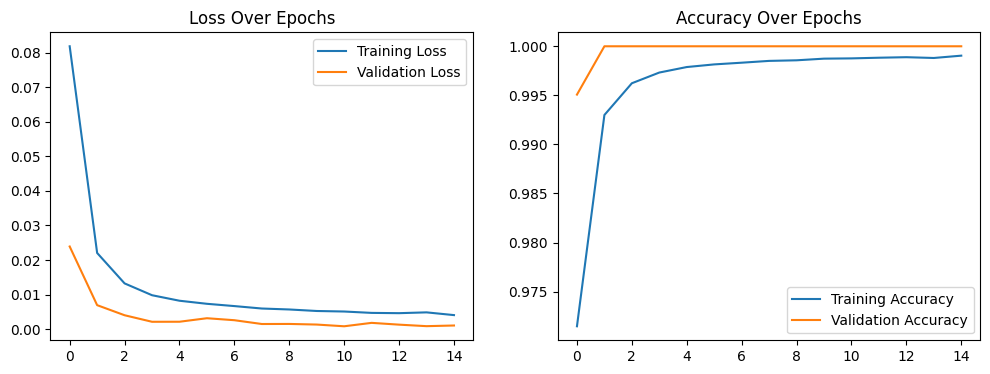

1781/1781 [==============================] - 0s 265us/step
[[56825    39]
 [   16    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.84      0.75        98

    accuracy                           1.00     56962
   macro avg       0.84      0.92      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [23]:
#Graphs of the first trial

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.show()

# Predictions and Further Evaluation
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int) # Converting probabilities to class labels

# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [24]:
#Second model

model2 = keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=X_train_resampled.shape[1]),
    layers.Dropout(0.9),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.9),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with SGD optimizer
sgd = optimizers.SGD(learning_rate=0.01)
model2.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])


y_pred = (model2.predict(X_test) > 0.5).astype("int32")
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Test Loss: {}, Test Accuracy: {}, Balanced accuracy: ".format(test_loss, test_accuracy, balanced_acc))


callbacks = [
    tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True),
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
]

# Retrain the model with callbacks
history = model2.fit(X_train_resampled, y_train_resampled, epochs=15, batch_size=64, validation_split=0.2, callbacks=callbacks)

1781/1781 [==============================] - 1s 325us/step - loss: 0.8196 - accuracy: 0.3683
Test Loss: 0.8196314573287964, Test Accuracy: 0.368315726518631, Balanced accuracy: 
Epoch 1/15
5687/5687 [==============================] - 3s 511us/step - loss: 0.4958 - accuracy: 0.7914 - val_loss: 0.2865 - val_accuracy: 0.8232
Epoch 2/15
 323/5687 [>.............................] - ETA: 2s - loss: 0.3690 - accuracy: 0.8609

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5687/5687 [==============================] - 3s 523us/step - loss: 0.3371 - accuracy: 0.8790 - val_loss: 0.3060 - val_accuracy: 0.8377
Epoch 3/15
5687/5687 [==============================] - 3s 519us/step - loss: 0.2874 - accuracy: 0.9023 - val_loss: 0.2737 - val_accuracy: 0.8657
Epoch 4/15
5687/5687 [==============================] - 3s 533us/step - loss: 0.2684 - accuracy: 0.9128 - val_loss: 0.2626 - val_accuracy: 0.8762
Epoch 5/15
5687/5687 [==============================] - 3s 520us/step - loss: 0.2578 - accuracy: 0.9179 - val_loss: 0.2557 - val_accuracy: 0.8789
Epoch 6/15
5687/5687 [==============================] - 3s 537us/step - loss: 0.2511 - accuracy: 0.9207 - val_loss: 0.2522 - val_accuracy: 0.8789
Epoch 7/15
5687/5687 [==============================] - 3s 538us/step - loss: 0.2462 - accuracy: 0.9225 - val_loss: 0.2340 - val_accuracy: 0.8839
Epoch 8/15
5687/5687 [==============================] - 3s 518us/step - loss: 0.2384 - accuracy: 0.9244 - val_loss: 0.2364 - val_accura

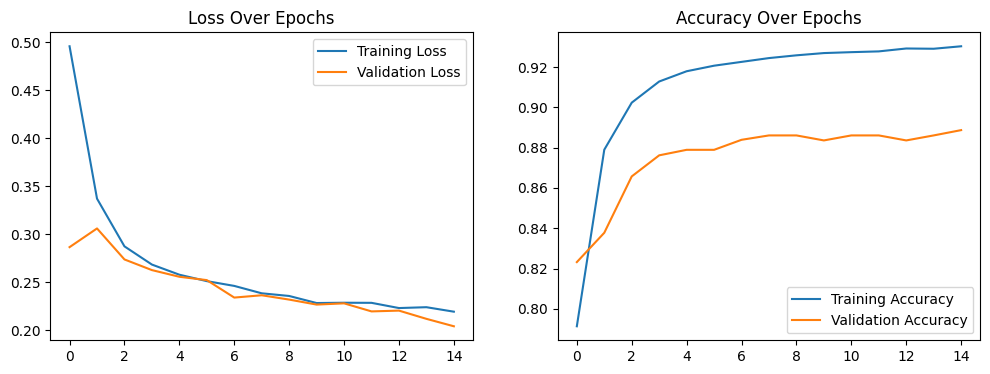

1781/1781 [==============================] - 1s 285us/step
[[56825    39]
 [   16    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.84      0.75        98

    accuracy                           1.00     56962
   macro avg       0.84      0.92      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [25]:
#Graphs of the Second trial

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.show()


# Predicting on test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")


# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [26]:
#Third model

model3 = keras.Sequential([
    layers.Dense(128, activation='tanh', input_dim=X_train_resampled.shape[1]),
    layers.Dropout(0.5),
    layers.Dense(64, activation='tanh'),
    layers.Dropout(0.5),
    layers.Dense(500, activation='tanh'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='tanh'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='tanh'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='softmax')
])

# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



test_loss, test_accuracy = model3.evaluate(X_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_accuracy))



callbacks = [
    tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True),
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
]

# Retrain the model with callbacks
history = model3.fit(X_train_resampled, y_train_resampled, epochs=15, batch_size=64, validation_split=0.2, callbacks=callbacks)

1781/1781 [==============================] - 1s 460us/step - loss: 0.7106 - accuracy: 0.0017
Test Loss: 0.7106496095657349, Test Accuracy: 0.001720445230603218
Epoch 1/15
5687/5687 [==============================] - 10s 2ms/step - loss: 0.1150 - accuracy: 0.3750 - val_loss: 0.0791 - val_accuracy: 1.0000
Epoch 2/15
 102/5687 [..............................] - ETA: 8s - loss: 0.0854 - accuracy: 0.3707

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5687/5687 [==============================] - 10s 2ms/step - loss: 0.0725 - accuracy: 0.3750 - val_loss: 0.0479 - val_accuracy: 1.0000
Epoch 3/15
5687/5687 [==============================] - 10s 2ms/step - loss: 0.0568 - accuracy: 0.3750 - val_loss: 0.0305 - val_accuracy: 1.0000
Epoch 4/15
5687/5687 [==============================] - 9s 2ms/step - loss: 0.0474 - accuracy: 0.3750 - val_loss: 0.0215 - val_accuracy: 1.0000
Epoch 5/15
5687/5687 [==============================] - 10s 2ms/step - loss: 0.0414 - accuracy: 0.3750 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 6/15
5687/5687 [==============================] - 9s 2ms/step - loss: 0.0379 - accuracy: 0.3750 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 7/15
5687/5687 [==============================] - 9s 2ms/step - loss: 0.0350 - accuracy: 0.3750 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 8/15
5687/5687 [==============================] - 9s 2ms/step - loss: 0.0330 - accuracy: 0.3750 - val_loss: 0.0053 - val_accuracy: 1.0000


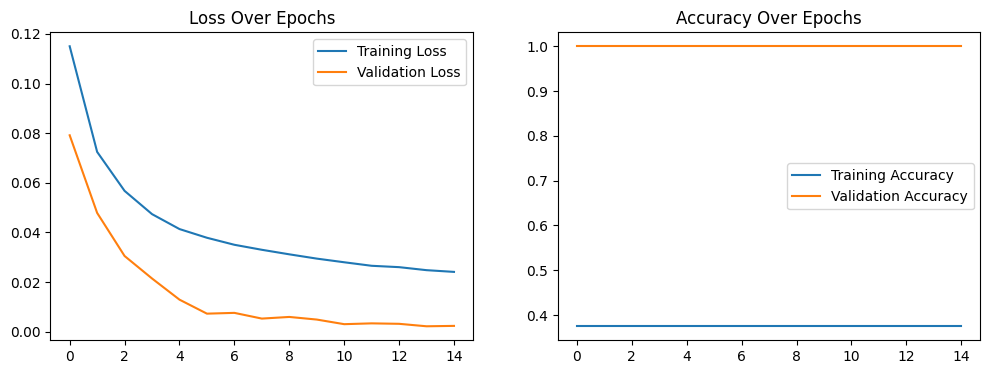

1781/1781 [==============================] - 1s 415us/step
[[    0 56864]
 [    0    98]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     56864
           1       0.00      1.00      0.00        98

    accuracy                           0.00     56962
   macro avg       0.00      0.50      0.00     56962
weighted avg       0.00      0.00      0.00     56962



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [27]:
#Graphs for Third Trial
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.show()

# Predictions and Further Evaluation
y_pred = model3.predict(X_test)
y_pred = (y_pred > 0.5).astype(int) # Converting probabilities to class labels

# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))